In [45]:
# Import Necessary Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings("ignore")

In [2]:
filepath = r"C:\Users\Asus\Desktop\ML_Herald\Repository\5CS037-2024-Rohit\Final Coursework\Dataset\parkinsons+telemonitoring\parkinsons_updrs.data"
df = pd.read_csv(filepath, delimiter = ",")
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [3]:
df.shape

(5875, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [5]:
df.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [6]:
df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [7]:
#Check for duplicates
df.duplicated().sum()

0

In [8]:
#Check for null values 
df.isnull().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

There are no null values and duplicates in the dataset. Since all the attributes are of numeric nature, I will also check for Not a number values(NaN).

In [9]:
#Check for NaN values
np.isnan(df).sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

There are no NaN values as well.

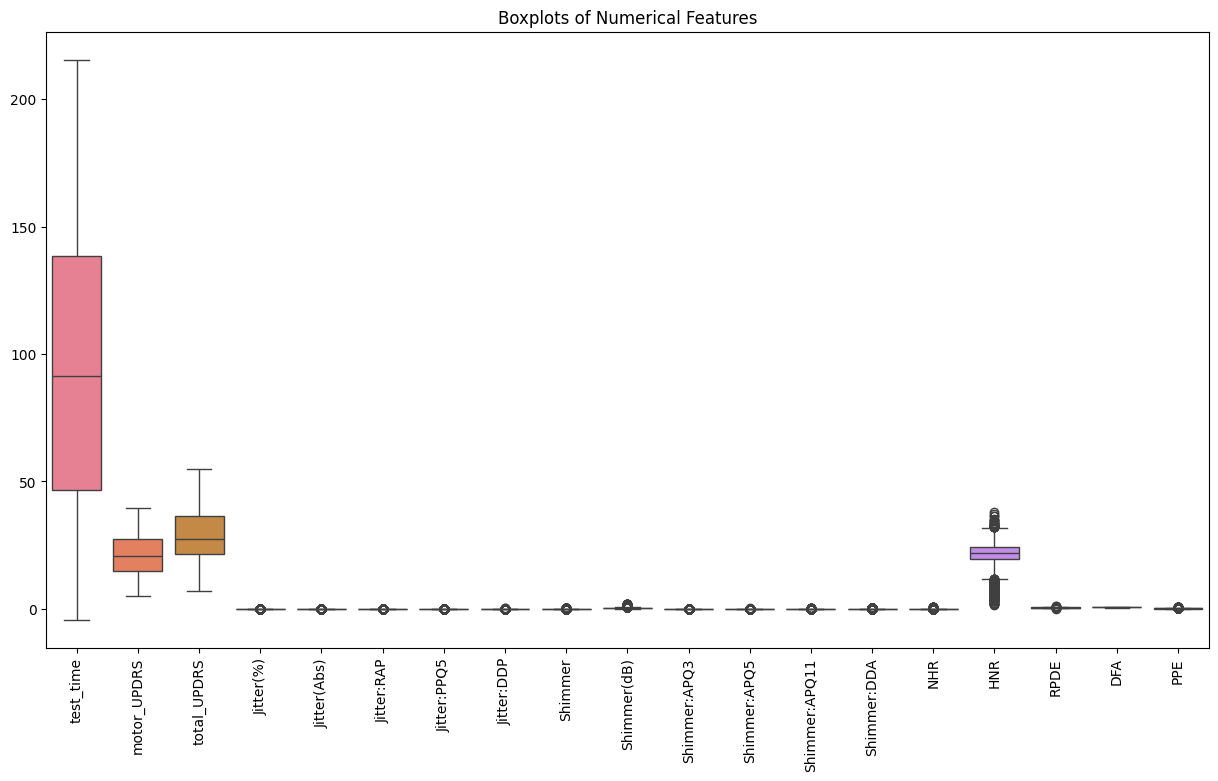

In [10]:
#Function for outliers visualization using boxplot 
def outliers_visualizer(X):
 plt.figure(figsize=(15, 8))
 sns.boxplot(data=X.select_dtypes(include=['float64']))
 plt.xticks(rotation=90)  # Rotate labels for readability
 plt.title("Boxplots of Numerical Features")
 plt.show()

#Call the above function
outliers_visualizer(df)

The boxplot shows that there are some outliers in the dataset. So, lets clip them.

In [11]:
#Clip the  outliers
def clip_outliers(X):
  numercial_features = X.select_dtypes(include = 'float64').columns
  outlier_counts = {}
  for feature in numercial_features:
      Q1 = X[feature].quantile(0.25)
      Q3 = X[feature].quantile(0.75)
      IQR = Q3 - Q1
      lower_limit = Q1 - 1.5 * IQR
      upper_limit = Q3 + 1.5 * IQR
      # Clip the outliers
      X[feature] = X[feature].clip(lower=lower_limit, upper=upper_limit)

    # Store count of outliers
      outliers = X[(X[feature] < lower_limit) | (X[feature] > upper_limit)]
      outlier_counts[feature] = outliers.shape[0]

 
  return outlier_counts

#Apply the function
clip_outliers(df)
    

{'test_time': 0,
 'motor_UPDRS': 0,
 'total_UPDRS': 0,
 'Jitter(%)': 0,
 'Jitter(Abs)': 0,
 'Jitter:RAP': 0,
 'Jitter:PPQ5': 0,
 'Jitter:DDP': 0,
 'Shimmer': 0,
 'Shimmer(dB)': 0,
 'Shimmer:APQ3': 0,
 'Shimmer:APQ5': 0,
 'Shimmer:APQ11': 0,
 'Shimmer:DDA': 0,
 'NHR': 0,
 'HNR': 0,
 'RPDE': 0,
 'DFA': 0,
 'PPE': 0}

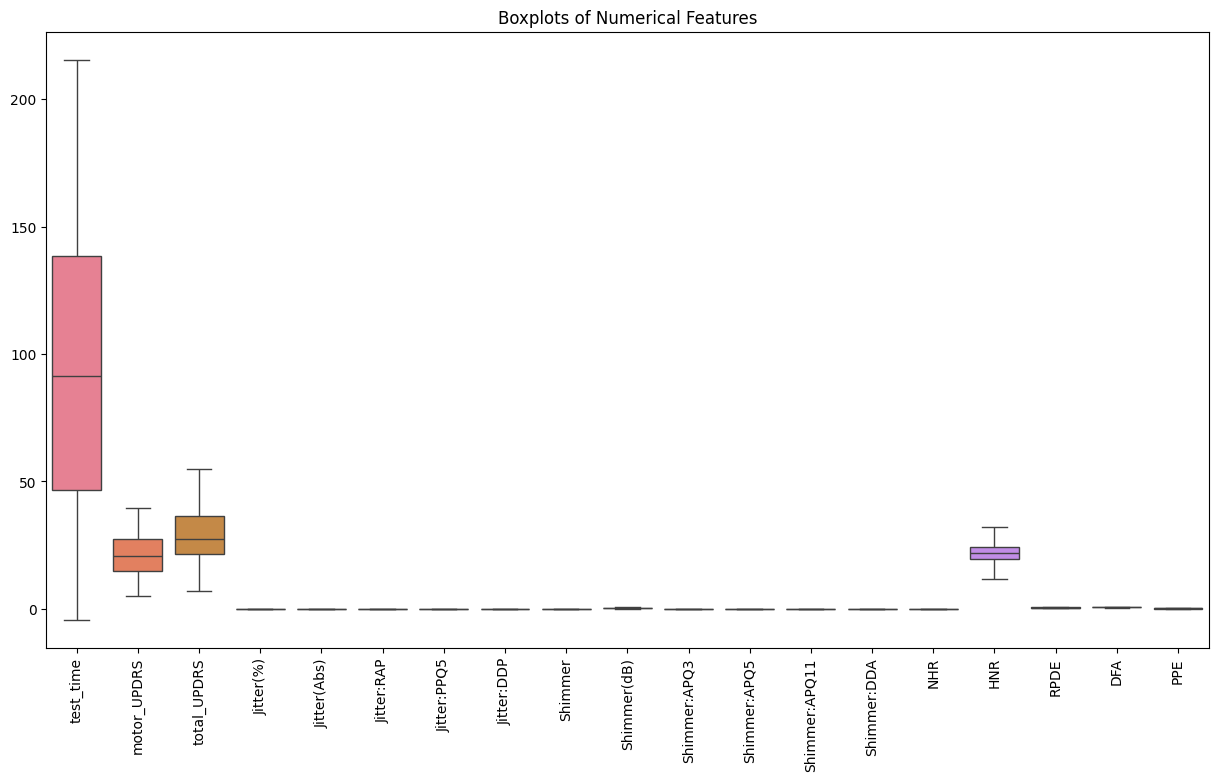

In [12]:
#checking for outliers after removing them  
outliers_visualizer(df)

In [13]:
df.drop(columns = ['subject#', 'age', 'sex']).corr()

,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
test_time,1.000000,0.067918,0.075263,-0.006863,-0.004574,-0.020119,-0.004638,-0.020091,-0.026668,-0.021241,-0.020369,-0.027099,-0.027452,-0.020371,-0.027806,0.036252,-0.037418,0.019261,0.000786
motor_UPDRS,0.067918,1.000000,0.947231,0.125301,0.056320,0.106399,0.122804,0.106437,0.130175,0.137247,0.106147,0.118396,0.166210,0.106137,0.124950,-0.163213,0.128087,-0.116242,0.165534
total_UPDRS,0.075263,0.947231,1.000000,0.118287,0.085890,0.101202,0.114896,0.101221,0.128329,0.133894,0.109623,0.120186,0.158613,0.109609,0.120699,-0.171240,0.156328,-0.113475,0.161505
Jitter(%),-0.006863,0.125301,0.118287,1.000000,0.919225,0.963928,0.967422,0.963951,0.632588,0.655230,0.596742,0.599133,0.613269,0.596750,0.781670,-0.728997,0.537678,0.424006,0.859078
Jitter(Abs),-0.004574,0.056320,0.085890,0.919225,1.000000,0.857901,0.902493,0.857947,0.610686,0.622983,0.571020,0.588097,0.606471,0.571030,0.739880,-0.730516,0.614976,0.458057,0.830572
Jitter:RAP,-0.020119,0.106399,0.101202,0.963928,0.857901,1.000000,0.952514,0.999998,0.622486,0.638471,0.606519,0.588033,0.574382,0.606527,0.752975,-0.701354,0.469845,0.395999,0.790647
Jitter:PPQ5,-0.004638,0.122804,0.114896,0.967422,0.902493,0.952514,1.000000,0.952533,0.660253,0.677126,0.627896,0.634759,0.640647,0.627898,0.753753,-0.754934,0.519226,0.456070,0.858182
Jitter:DDP,-0.020091,0.106437,0.101221,0.963951,0.857947,0.999998,0.952533,1.000000,0.622524,0.638516,0.606551,0.588067,0.574421,0.606560,0.753026,-0.701379,0.469852,0.395933,0.790684
Shimmer,-0.026668,0.130175,0.128329,0.632588,0.610686,0.622486,0.660253,0.622524,1.000000,0.987704,0.984629,0.989350,0.956619,0.984631,0.675404,-0.796204,0.497548,0.244260,0.632068
Shimmer(dB),-0.021241,0.137247,0.133894,0.655230,0.622983,0.638471,0.677126,0.638516,0.987704,1.000000,0.966398,0.974553,0.949311,0.966401,0.704754,-0.787240,0.494688,0.228223,0.650767


Our target variable is total_UPDRS.
Key Observations from Correlation Scores:
motor_UPDRS (0.947): Extremely high correlation with total_UPDRS. This is expected since total_UPDRS includes motor symptoms.
Shimmer:APQ11 (0.1586), PPE (0.1615), and HNR (-0.1712) have the next highest absolute correlations.
Jitter and Shimmer features have moderate correlations (0.101–0.133).
RPDE, DFA, and test_time have weak correlations.

<Axes: >

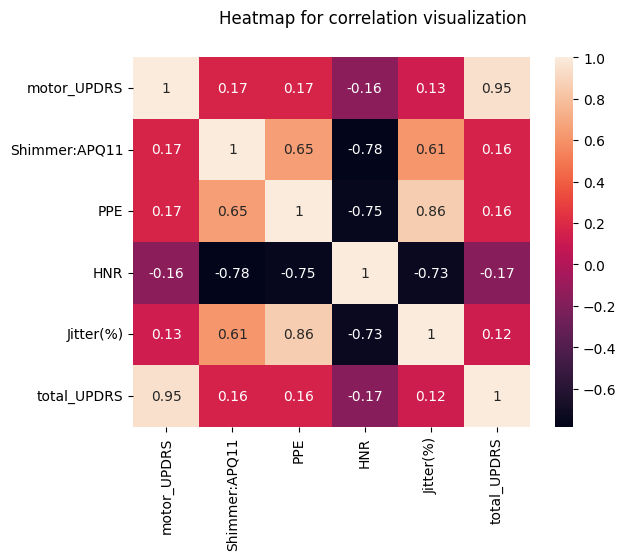

In [14]:
selectedVars = ['motor_UPDRS', 'Shimmer:APQ11', 'PPE', 'HNR', 'Jitter(%)', 'total_UPDRS']
#Heatmap for correlation visualization 
plt.suptitle("Heatmap for correlation visualization")
sns.heatmap(df[selectedVars].corr(), annot = True)

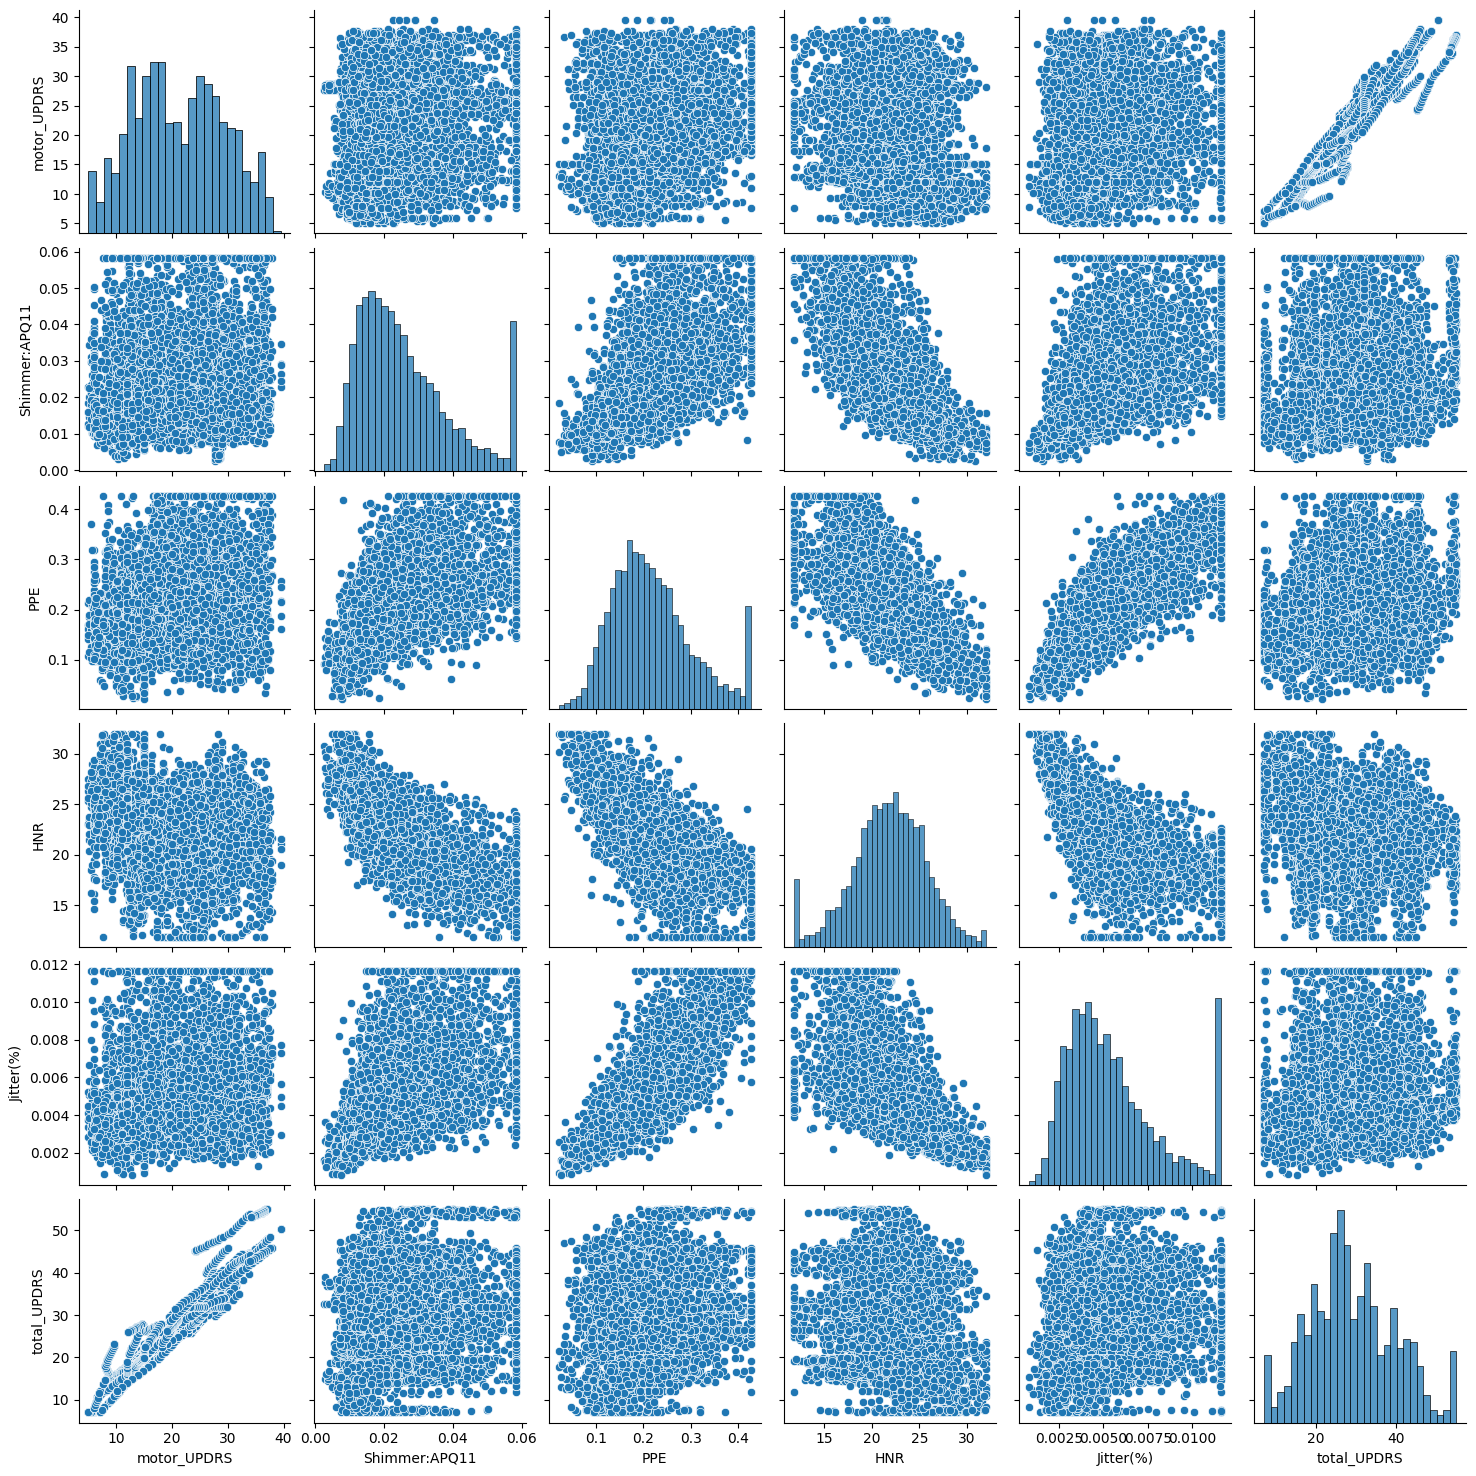

In [15]:
sns.pairplot(df, vars = selectedVars)

Seems like except motor_UPDRS other features do not have high correlation with total_UPDRS. 

In [16]:
#Create a feature matrix and label vector
featurestodrop = ["age", "sex", "subject#", "total_UPDRS", "test_time", "DFA", "RPDE"]
X = df.drop(columns = featurestodrop)
y = df['total_UPDRS']

In [ ]:
# Feature Matrix
X.head()

,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,PPE
0,28.199,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.16006
1,28.447,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.10810
2,28.695,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.21014
3,28.905,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.33277
4,29.187,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.19361


In [ ]:
# Label Vector
y.head()

0    34.398
1    34.894
2    35.389
3    35.810
4    36.375
Name: total_UPDRS, dtype: float64

In [ ]:
# Function for train test split 
def train_test_split(X, y, test_size = 0.3, random_seed = 42):
    """
    Splits dataset into train and test sets.
    Arguments:
    X : np.ndarray
    Feature matrix.
    y : np.ndarray
    Target array.
    test_size : float
    Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
    Seed for reproducibility.
    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
    Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]

    return X_train, X_test, y_train, y_test   
#Split the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size= 0.3, random_seed= 42)

In [20]:
print(f"X_train shape:{X_train.shape}\nX_test shape: {X_test.shape}\nX shape: {X.shape}")
print(f"y_train shape:{y_train.shape}\ny_test shape: {y_test.shape}\ny shape: {y.shape}")

X_train shape:(4113, 15)
X_test shape: (1762, 15)
X shape: (5875, 15)
y_train shape:(4113,)
y_test shape: (1762,)
y shape: (5875,)


In [ ]:
#Standardization
scaler = StandardScaler()
# Fit and transform the training set
X_train_normalized = scaler.fit_transform(X_train)
# Transform the testing set
X_test_normalized = scaler.transform(X_test)

In [22]:
type(X_train_normalized)

numpy.ndarray

In [47]:
#Linear Regression from scratch
class LinearRegression:
    """
    A class implementing Linear Regression using gradient descent.
    
    Attributes:
        learning_rate (float): The step size for gradient descent
        iterations (int): Number of training iterations
        theta (numpy.ndarray): Model weights
        bias (float): Model bias term
    """
    
    def __init__(self, learning_rate=0.01, iterations=1000):
        """
        Initialize the Linear Regression model.
        
        Args:
            learning_rate (float): Learning rate for gradient descent
            iterations (int): Number of training iterations
        """
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        """
        Fit the linear regression model to training data.
        
        Args:
            X (numpy.ndarray): Training features
            y (numpy.ndarray): Target values
        """
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n)
        self.bias = 0
        self.X = X
        self.y = y

        for i in range(self.iterations):
            self.update_weights()
            # Show loss every 100 iterations
            if (i + 1) % 100 == 0:
                y_pred = self.predict(self.X)
                loss = np.mean((self.y - y_pred) ** 2)
                print(f'Iteration {i+1}: Loss = {loss:.6f}')

    def update_weights(self):
        """
        Update model weights using gradient descent.
        """
        y_pred = self.predict(self.X)
        d_theta = -(2 / self.m) * np.dot(self.X.T, (self.y - y_pred))
        d_bias = -(2 / self.m) * np.sum(self.y - y_pred)

        self.theta -= self.learning_rate * d_theta
        self.bias -= self.learning_rate * d_bias

    def predict(self, X):
        """
        Make predictions using the trained model.
        
        Args:
            X (numpy.ndarray): Input features
            
        Returns:
            numpy.ndarray: Predicted values
        """
        return np.dot(X, self.theta) + self.bias

In [48]:
# Train the model
model = LinearRegression(learning_rate=0.01, iterations=1000)
# Fit the model
model.fit(X_train_normalized, y_train)

Iteration 100: Loss = 28.426797
Iteration 200: Loss = 11.742497
Iteration 300: Loss = 11.224545
Iteration 400: Loss = 11.070553
Iteration 500: Loss = 10.970780
Iteration 600: Loss = 10.901984
Iteration 700: Loss = 10.853063
Iteration 800: Loss = 10.817215
Iteration 900: Loss = 10.790150
Iteration 1000: Loss = 10.769121


In [49]:
#Predict
y_pred = model.predict(X_test_normalized)

# Print the first 10 predictions
print(y_pred[:10])

[43.92649468 10.28734664 15.84817544 18.77275281 34.68101907 25.10663353
 16.95215699 35.16603111 25.26983068 36.65086003]


In [25]:
# Model Evaluation of Linear Regression from Scratch (Training Set)
y_pred_train = model.predict(X_train_normalized)
mse_linearScratch = mean_squared_error(y_pred_train, y_train)
print(mse_linearScratch)

r2_score_linearScratch = r2_score(y_train, y_pred_train)
print(r2_score_linearScratch)

10.769120833310529
0.906622881956318


In [26]:
# Model Evaluation of Linear Regression from Scratch (Testing Set)
mse_linearScratch = mean_squared_error(y_pred, y_test)
print(mse_linearScratch)

r2_score_linearScratch = r2_score(y_test, y_pred)
print(r2_score_linearScratch)

10.890121490836943
0.903184860798076


Linear Regression performed well with lower mean squared error and higher r2 score.The error in the training set and testing set are almost equal which indicates model is neither overfit nor underfit. 

Model 1
Decision Tree Regressor

In [27]:
# Initialize Decision Tree Regressor
dtRegressor = DecisionTreeRegressor()
# Fit model on raw (unscaled) data
dtRegressor.fit(X_train, y_train)
y_pred_tree = dtRegressor.predict(X_test)


In [28]:
# Evaluate performance
mse = mean_squared_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)

print(f"Mean Squared Error(Decision Tree Regressor): {mse:.4f}")
print(f"R-squared Score(Decision Tree Regressor): {r2:.4f}")

Mean Squared Error(Decision Tree Regressor): 9.3516
R-squared Score(Decision Tree Regressor): 0.9169


Decision Tree Regressor performed better than linear regression built from scratch with relatively lower mean squared error and higher r2 score

Model 2
K Nearest Neighbors Regressor

In [29]:
# Initialize KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Fit model on standardized data
knn_reg.fit(X_train_normalized, y_train)

# Make predictions
y_pred_knn = knn_reg.predict(X_test_normalized)


In [30]:
# Evaluate performance
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print(f"Mean Squared Error(KNN Regressor): {mse:.4f}")
print(f"R-squared Score(KNN Regressor): {r2:.4f}")

Mean Squared Error(KNN Regressor): 9.5755
R-squared Score(KNN Regressor): 0.9149


As per the evaluation metrics, decision tree regressor performed slightly well than KNN regressor. So we will use decision tree regressor for final model building.

Hyperparameter Tuning with Cross Validation for Decision Tree Regressor

In [31]:
# Define the parameter grid for Decision Tree Regressor
param_grid_dt = {
    'max_depth': [3, 5, 7, 9, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'absolute_error', 'gini', 'entropy']
}
#Initialize the model
dt = DecisionTreeRegressor(random_state=42)

#Initialize the GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

#Fit the model
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and best score for Decision Tree
best_params_dt = grid_search_dt.best_params_
best_score_dt = -grid_search_dt.best_score_


#print the best hyperparameters and mean squared error for decision tree
print(f"Best parameters for Decision Tree Regressor: {best_params_dt}")
print(f"Best cross-validated MSE for Decision Tree Regressor: {best_score_dt}")

Best parameters for Decision Tree Regressor: {'criterion': 'squared_error', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validated MSE for Decision Tree Regressor: 8.076859512801843


Hyperparameter Tuning with Cross Valiation for KNN Regressor

In [32]:
# Define the parameter grid for KNN Regressor
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize the GridSearchCV
grid_search_knn = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search_knn.fit(X_train_normalized, y_train)

# Get the best parameters and best score for KNN Regressor
best_params_knn = grid_search_knn.best_params_
best_score_knn = -grid_search_knn.best_score_

# Print the best hyperparameters and mean squared error for KNN Regressor
print(f"Best parameters for KNN Regressor: {best_params_knn}")
print(f"Best cross-validated MSE for KNN Regressor: {best_score_knn}")

Best parameters for KNN Regressor: {'algorithm': 'brute', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validated MSE for KNN Regressor: 10.373730858581995


Using the rule of thumb, we will use (N)^1/2 to calculate optimal number of features to select. 
There are 15 features in the original dataset. So the square root of 15 is ~4. 

In [33]:
# Apply RFE with Decision Tree Regressor
dt_model = DecisionTreeRegressor()
rfe_dt = RFE(estimator=dt_model, n_features_to_select=4)  # Select top 4 features
X_train_dt = rfe_dt.fit_transform(X_train, y_train)
X_test_dt = rfe_dt.transform(X_test)

selected_features_dt = X.columns[rfe_dt.support_]
print("Selected Features for Decision Tree Regressor:", selected_features_dt)

Selected Features for Decision Tree Regressor: Index(['motor_UPDRS', 'Jitter(Abs)', 'Jitter:PPQ5', 'HNR'], dtype='object')


In [ ]:
# Initialize feature selector
selector = SelectKBest(score_func=f_regression, k=4)

# Fit and transform the data
selector.fit(X_train_normalized, y_train)

# Get selected feature indices
selected_features_mask = selector.get_support()

# Get selected feature names
selected_features_knn = X.columns[selected_features_mask].tolist()
print("Selected Features for KNN Regressor:", selected_features_knn)

# Print feature scores
scores = dict(zip(X.columns, selector.scores_))
sorted_scores = dict(sorted(scores.items(), key=lambda x: x[1], reverse=True))

for feature, score in sorted_scores.items():
    print(f"{feature}: {score:.4f}")

Selected Features for KNN Regressor: ['motor_UPDRS', 'Shimmer:APQ11', 'HNR', 'PPE']
motor_UPDRS: 36294.0370
HNR: 128.8032
PPE: 108.5673
Shimmer:APQ11: 97.2268
Shimmer(dB): 67.4276
Shimmer: 61.6642
Jitter(%): 56.6124
Shimmer:APQ5: 54.9475
Jitter:PPQ5: 52.2777
NHR: 52.0884
Shimmer:APQ3: 44.0461
Shimmer:DDA: 44.0378
Jitter:DDP: 41.2465
Jitter:RAP: 41.2407
Jitter(Abs): 28.0652


Final Model Building using Decision Tree Regressor

In [46]:
selected_features = ['motor_UPDRS', 'Jitter(Abs)', 'Shimmer:APQ5', 'HNR']
X_selected = df[selected_features]
y = df['total_UPDRS']

#Split the dataset 
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_selected.values, y.values, test_size = 0.3, random_seed = 42)
print(X_selected.shape)
print(X_train_s.shape)
print(X_test_s.shape)

print(y.shape)
print(y_train_s.shape)
print(y_test_s.shape)

(5875, 4)
(4113, 4)
(1762, 4)
(5875,)
(4113,)
(1762,)


In [36]:
#Initialize the decision tree regressor with best set of hyperparameters 
dt_final = DecisionTreeRegressor(criterion='squared_error', max_depth= 7, min_samples_leaf= 4, min_samples_split= 10)

#Fit the model
dt_final.fit(X_train_s, y_train_s)

# Make predictions
y_pred_final = dt_final.predict(X_test_s)

Model Evalaution of Final Model

In [ ]:
# Mean Squared Error of final model 
mse_final = mean_squared_error(y_test_s, y_pred_final)
print(f"MSE of final model: {mse_final}")

# r2 score of final model 
r2_final = r2_score(y_test_s, y_pred_final)
print(f"r2 score of final model: {r2_final}")

MSE of final model: 8.752648857815295
r2 score of final model: 0.9221873770400129


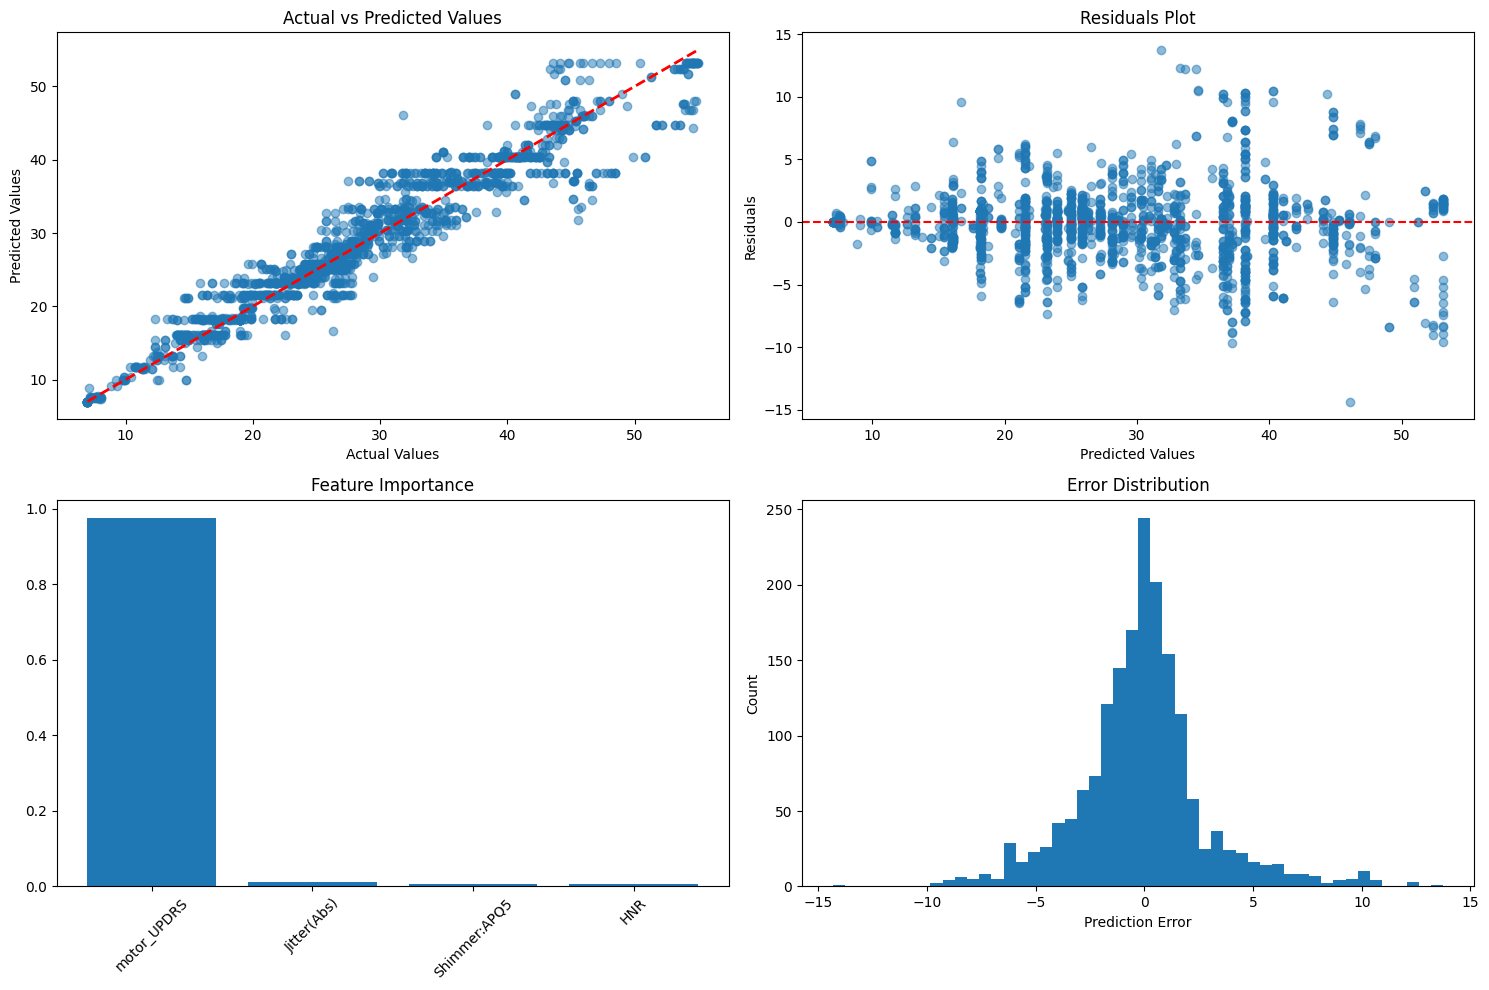

In [51]:
# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# Plot 1: Actual vs Predicted Values
plt.subplot(2, 2, 1)
plt.scatter(y_test_s, y_pred_final, alpha=0.5)
plt.plot([y_test_s.min(), y_test_s.max()], [y_test_s.min(), y_test_s.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot 2: Residuals Plot
residuals = y_test_s - y_pred_final
plt.subplot(2, 2, 2)
plt.scatter(y_pred_final, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')

# Plot 3: Feature Importance
importances = dt_final.feature_importances_
features = ['motor_UPDRS', 'Jitter(Abs)', 'Shimmer:APQ5', 'HNR']
plt.subplot(2, 2, 3)
plt.bar(features, importances)
plt.xticks(rotation=45)
plt.title('Feature Importance')


# Plot 4: Error Distribution
plt.subplot(2, 2, 4)
plt.hist(residuals, bins=50)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Error Distribution')

plt.tight_layout()
plt.show()

# Model Summary and Performance Analysis

## Model Selection and Evaluation
- Three regression models were implemented and compared:
    1. Linear Regression (from scratch)
    2. Decision Tree Regressor
    3. K-Nearest Neighbors Regressor

## Best Performing Model: Decision Tree Regressor
- **Final Configuration:**
    - Max Depth: 7
    - Min Samples Leaf: 4
    - Min Samples Split: 10
    - Criterion: squared_error

## Performance Metrics
- **MSE:**
    - Linear Regression: 10.89
    - KNN Regressor: 9.58
    - Final Decision Tree: 8.75

- **R² Score:**
    - Linear Regression: 0.903
    - KNN Regressor: 0.915
    - Final Decision Tree: 0.922

## Feature Selection
- Selected 4 most important features:
    1. motor_UPDRS (97.52% importance)
    2. Jitter(Abs) (1.25% importance)
    3. Shimmer:APQ5 (0.57% importance)
    4. HNR (0.66% importance)

## Model Characteristics
- No overfitting observed (similar training and testing errors)
- Strong predictive power with 92.2% variance explained
- motor_UPDRS shows dominant importance in predictions